# Plotting a Heart with Spiking Neurons 

In [1]:
# imports
import numpy as np

from IPython.display import Image

import nengo
from nengo_gui.ipython import IPythonViz

Because spiking neurons are temporal in nature, we need to model the x and y values parametrically to plot the heart curve. We use the equations (credit: [Wolfram Mathworld](http://mathworld.wolfram.com/HeartCurve.html))

$x=16\sin^3t$  
$y=13\cos t - 5\cos(2t)-2\cos(3t)-\cos(4t)$

While this gets us the correct shape, we will want to make a few modifications. Firstly, I scale down the size just to require less of a radius for the ensemble. This is done by multiplying both equations by a scaling factor k. The second modification is to scale the frequency values by a constant, c, to speed up the signals and make the heart appear solid. Thus, our new equations are:

$x=k(16\sin^3t)$  
$y=k(13\cos(ct) - 5\cos(2ct)-2\cos(3ct)-\cos(4ct))$

## Create the Model

In Nengo, we can use a 2-D ensemble of neurons to represent a vector by using each of its dimensions to represent a scalar, then projecting both values to an xy-plot. Generally for a simple scalar, it is necessary to use at least 50 neurons for a good representation. For the 2-D vector, 100 neurons would be adequate, but becuase of the high frequency we would like to show, we get a smoother representation with 200 neurons. Nengo defaults to using the *Leaky Integrate-and-Fire (LIF)* neuron. The final adjustment we need to make is to increase the ensemble radius to account for the maximum values of each signal. Otherwise the signal will get saturated and poorly represented (Try it yourself: change `radius=1` in the Heart ensemble then re-run the simulation and notice the difference.

In [2]:
model = nengo.Network(label='Heart Shaped Neurons')
with model:
    #Input Nodes
    k = 0.25       # Scale size of the heart (must also increase ensemble radius)
    c = 20         # increases the frequency for clearer representation
    x = nengo.Node(lambda t: k*16*((np.sin(c*t))**3))
    y = nengo.Node(lambda t: k*(13*np.cos(c*t)-5*np.cos(c*2*t)-2*np.cos(c*3*t)-np.cos(c*4*t)))
    
    #Ensemble with 100 LIF neurons which represents a 2-dimensional signal
    heart = nengo.Ensemble(200, dimensions=2, radius=5)
    
    #Connecnting input to ensemble
    nengo.Connection(x, heart[0])
    nengo.Connection(y, heart[1])

## Run the model

Import the nengo_gui visualizer to run and visualize the model. You might need to adjust some things in the visualizer such as showing the plot or changing its range. This can all be done by right-clicking on the corresponding components and opening sub-menus.

In [3]:
IPythonViz(model, "vectors.py.cfg")     # Use configuration file from 'How to Build' a Brain tutorials

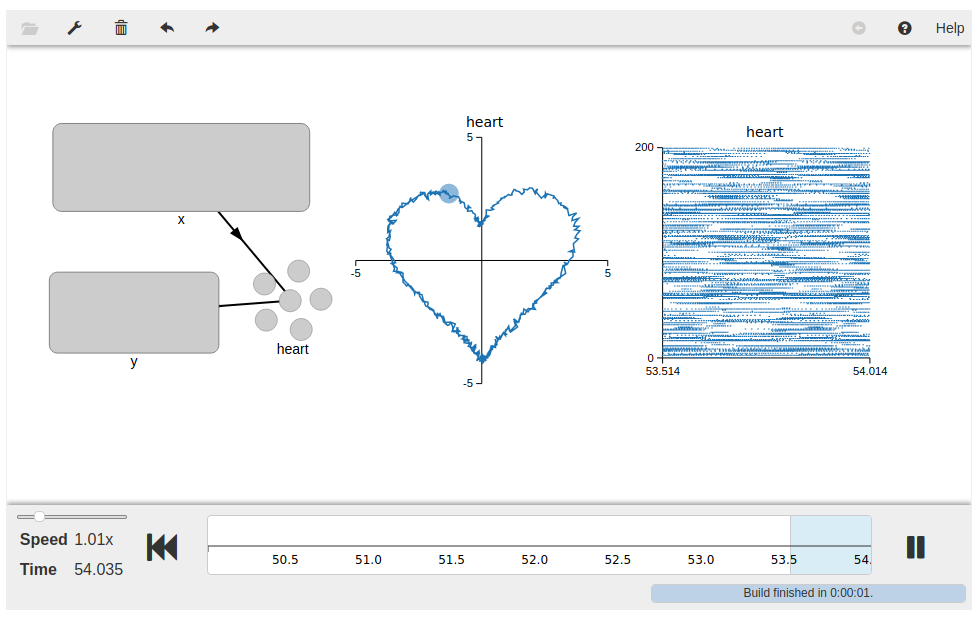

In [5]:
Image(filename='Images/hearts.png')